<a href="https://colab.research.google.com/github/GengGengGengGeng/D4/blob/main/Lab10_Ding_Geng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab10: Decision Tree
## Divorce data

#### Import

In [2]:
import pandas as pd

# models
from sklearn.tree import DecisionTreeClassifier

from sklearn import tree

# train test split
from sklearn.model_selection import train_test_split

# Model evle
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [3]:
url ='https://raw.githubusercontent.com/asukul/DS301-f19/master/datasets/divorce/divorce-csv.csv'
divorce_df = pd.read_csv(url)
divorce_df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [4]:
divorce_df.shape

(170, 55)

#### Prepare the data

In [5]:
X = divorce_df.drop(['Class'],axis = 1)
y = divorce_df['Class']
print(X.shape, "X type is ", type(X))
print(y.shape, "y type is ", type(y))

(170, 54) X type is  <class 'pandas.core.frame.DataFrame'>
(170,) y type is  <class 'pandas.core.series.Series'>


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 24)

print(X_train.shape,X_test.shape)

(136, 54) (34, 54)


#### Decision tree

In [7]:
# Create an instance of the model
dt = DecisionTreeClassifier()

#Train
dt.fit(X_train, y_train)

#Do prediction
preds = dt.predict(X_test)

#Accuracy score
score = accuracy_score(y_test, preds)

print(score)

0.9705882352941176


#### Tree visualization

In [8]:
#used to export trees
from sklearn.tree import export_graphviz

# Used to run programs from Python cod
from subprocess import check_call

# Used to read and show image in Python
from PIL import Image

In [9]:
#Export the decision tree


export_graphviz(dt,out_file = 'tree.dot', feature_names = X.columns, max_depth = 5,
                class_names = ['Potential divorce', "Healthy Marriage"])

In [10]:
# use check_call
check_call(['dot','-Tpng','tree.dot','-o','tree.png'])

0

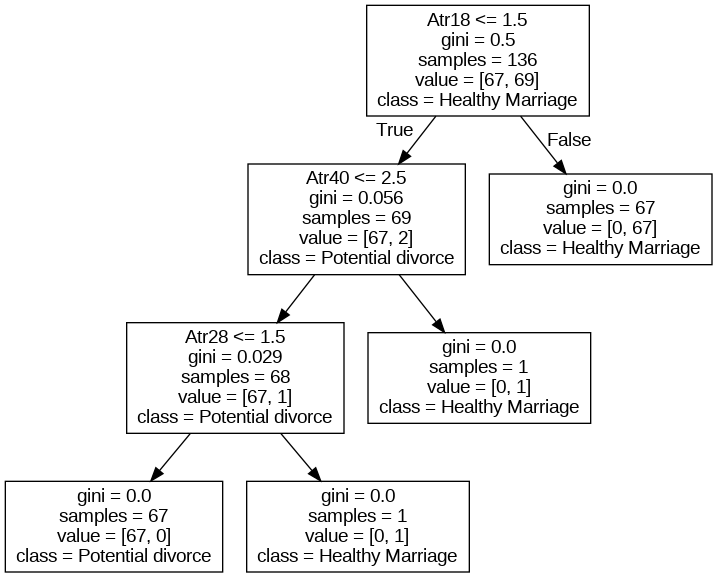

In [11]:
image = Image.open('tree.png')
image